<a href="https://colab.research.google.com/github/jonnie763/DATA-Science-601/blob/main/Data_Science_Project_1_Maryland_Statistics_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd                       # I typically type as many libraries as possible, just in case 
import numpy as np        
import pandas as pd                       # For the dataframes 
import matplotlib.pyplot as plt           # For the visualizations of the datframes 
import os                                 # Most of the others are just in case 
import random
import math
from zipfile import ZipFile
import matplotlib.pyplot as plt         


plt.rcParams['figure.figsize'] = 12, 12   # My screen is quite big, so this may be too big for some but these dimensions are fine in most cases (dimensions of graph )
 

Maryland_df = pd.read_csv("maryland-history (2).csv") # Read csv using this code, print df (Maryland Records)
Maryland_df                                           # Dateframe of csv 

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-02-19,MD,7677.0,7495.0,16,182.0,34265.0,34265.0,1016.0,97,NaN,272.0,2951435,6451,NaN,167357.0,NaN,NaN,NaN,374974,374974,1008,0,NaN,NaN,26456.0,NaN,457509.0,9591.0,NaN,0,7597220.0,42207,NaN,NaN,193813.0,NaN,3326409.0,7459,7597220.0,42207
1,2021-02-18,MD,7661.0,7479.0,31,182.0,34168.0,34168.0,1048.0,90,NaN,279.0,2944984,6568,NaN,167357.0,NaN,NaN,NaN,373966,373966,986,0,NaN,NaN,26456.0,NaN,456223.0,9587.0,NaN,0,7555013.0,35950,NaN,NaN,193813.0,NaN,3318950.0,7554,7555013.0,35950
2,2021-02-17,MD,7630.0,7449.0,18,181.0,34078.0,34078.0,1096.0,98,NaN,272.0,2938416,4835,NaN,167357.0,NaN,NaN,NaN,372980,372980,759,0,NaN,NaN,26456.0,NaN,454985.0,9571.0,NaN,0,7519063.0,23155,NaN,NaN,193813.0,NaN,3311396.0,5594,7519063.0,23155
3,2021-02-16,MD,7612.0,7430.0,32,182.0,33980.0,33980.0,1110.0,77,NaN,293.0,2933581,2843,NaN,166267.0,NaN,NaN,NaN,372221,372221,516,0,NaN,NaN,25610.0,NaN,453991.0,9571.0,NaN,0,7495908.0,9967,NaN,NaN,191877.0,NaN,3305802.0,3359,7495908.0,9967
4,2021-02-15,MD,7580.0,7400.0,26,180.0,33903.0,33903.0,1113.0,95,NaN,285.0,2930738,4336,NaN,166267.0,NaN,NaN,NaN,371705,371705,722,0,NaN,NaN,25610.0,NaN,453329.0,9569.0,NaN,0,7485941.0,19761,NaN,NaN,191877.0,NaN,3302443.0,5058,7485941.0,19761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2020-03-09,MD,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,73,21,NaN,NaN,NaN,NaN,NaN,5,5,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
348,2020-03-08,MD,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,52,11,NaN,NaN,NaN,NaN,NaN,3,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
349,2020-03-07,MD,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,41,15,NaN,NaN,NaN,NaN,NaN,3,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
350,2020-03-06,MD,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,26,9,NaN,NaN,NaN,NaN,NaN,3,3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


##1.Pull data  to measure "trends"

In [23]:
MD_COL = Maryland_df [['positiveIncrease','hospitalizedIncrease','date','deathIncrease']] # I pulled increasing data to measure and visualize trends better 
MD_COL

,positiveIncrease,hospitalizedIncrease,date,deathIncrease
0,1008,97,2021-02-19,16
1,986,90,2021-02-18,31
2,759,98,2021-02-17,18
3,516,77,2021-02-16,32
4,722,95,2021-02-15,26
...,...,...,...,...
347,2,0,2020-03-09,0
348,0,0,2020-03-08,0
349,0,0,2020-03-07,0
350,3,0,2020-03-06,0


In [24]:
MD_COL_D= Maryland_df [['date','deathIncrease']] # Visual death increase first 
MD_COL_D

,date,deathIncrease
0,2021-02-19,16
1,2021-02-18,31
2,2021-02-17,18
3,2021-02-16,32
4,2021-02-15,26
...,...,...
347,2020-03-09,0
348,2020-03-08,0
349,2020-03-07,0
350,2020-03-06,0


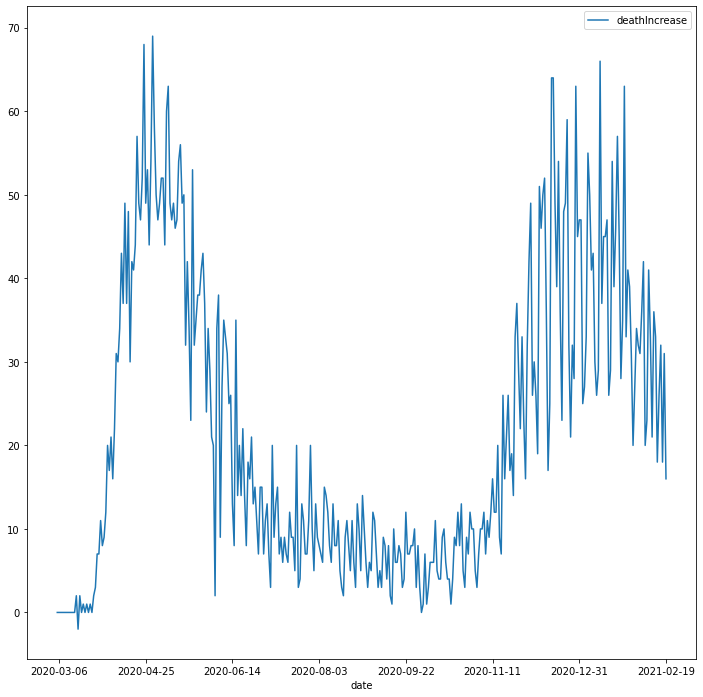

In [25]:
MD_COL_D.plot(kind='line',x='date',y='deathIncrease') # This graph takes daily averages, this is a reference to see its spikes versus the "smoothed" graph below (only reference that will be provided)
plt.gca().invert_xaxis()

In [26]:
for i in range(0,MD_COL_D.shape[0]-7): # Citation: https://www.datacamp.com/community/tutorials/moving-averages-in-pandas
    
    MD_COL_D.loc[MD_COL_D.index[i+2],'Deaths Rolling Avearge (7 days)'] = np.round(((MD_COL_D.iloc[i,1]+ MD_COL_D.iloc[i+1,1] +MD_COL_D.iloc[i+2,1]+MD_COL_D.iloc[i+3,1]+MD_COL_D.iloc[i+4,1]+MD_COL_D.iloc[i+5,1]+MD_COL_D.iloc[i+6,1])/7),1) 

MD_COL_D  # Looking at the first set of graphs there was too much "noise", in order to reduce the "noise" the code above takes 7 previous cells and divides them by 7, making a rolling average or a weekly average to reduce "spikes" in the graph 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,date,deathIncrease,Deaths Rolling Avearge (7 days)
0,2021-02-19,16,NaN
1,2021-02-18,31,NaN
2,2021-02-17,18,24.9
3,2021-02-16,32,27.7
4,2021-02-15,26,26.3
...,...,...,...
347,2020-03-09,0,NaN
348,2020-03-08,0,NaN
349,2020-03-07,0,NaN
350,2020-03-06,0,NaN


Text(230, 55, 'Note:Each date is the average of the 7 days previous (Weekly Average)')

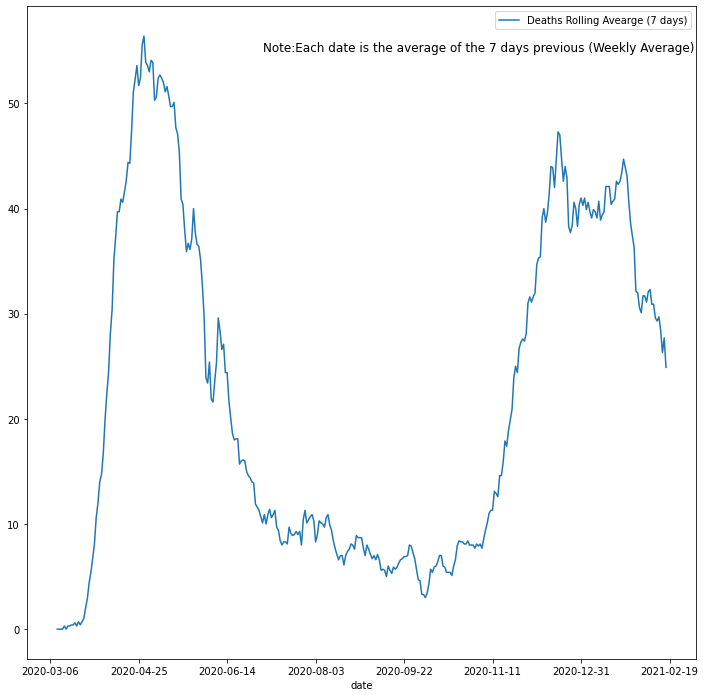

In [27]:
MD_COL_D.plot(kind='line',x='date',y='Deaths Rolling Avearge (7 days)') # This graph takes weekly averages, thus each date is the average of the 7 days previous (Weekly Average)
plt.gca().invert_xaxis()

plt.text(230, 55, r'Note:Each date is the average of the 7 days previous (Weekly Average)',fontsize=12) # Annotation for the reader of the graph 

In [28]:
MD_COL_H= Maryland_df [['date','hospitalizedIncrease']]

for i in range(0,MD_COL_H.shape[0]-7): #https://www.datacamp.com/community/tutorials/moving-averages-in-pandas
    
    MD_COL_H.loc[MD_COL_H.index[i+2],'Hospitalized Rolling Avearge'] = np.round(((MD_COL_H.iloc[i,1]+ MD_COL_H.iloc[i+1,1] +MD_COL_H.iloc[i+2,1]+MD_COL_H.iloc[i+3,1]+MD_COL_H.iloc[i+4,1]+MD_COL_H.iloc[i+5,1]+MD_COL_H.iloc[i+6,1])/7),1) 

MD_COL_H                              # Looking at the first set of graphs there was too much "noise", in order to reduce the "noise" the code above takes 7 previous cells and divides them by 7, making a rolling average or a weekly average to reduce "spikes" in the graph

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,date,hospitalizedIncrease,Hospitalized Rolling Avearge
0,2021-02-19,97,NaN
1,2021-02-18,90,NaN
2,2021-02-17,98,90.9
3,2021-02-16,77,94.3
4,2021-02-15,95,97.1
...,...,...,...
347,2020-03-09,0,NaN
348,2020-03-08,0,NaN
349,2020-03-07,0,NaN
350,2020-03-06,0,NaN


Text(340, 200, 'Note:Each date is the average of the 7 days previous (Weekly Average)')

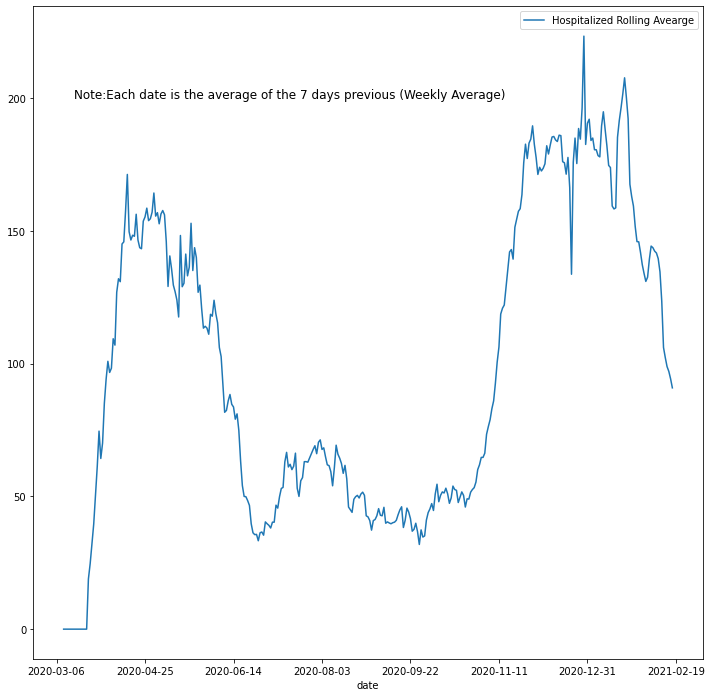

In [29]:
MD_COL_H.plot(kind='line',x='date',y='Hospitalized Rolling Avearge') ##https://www.datacamp.com/community/tutorials/moving-averages-in-pandas
    
plt.gca().invert_xaxis() # Looking at the first set of graphs there was too much "noise", in order to reduce the "noise" the code above takes 7 previous cells and divides them by 7, making a rolling average or a weekly average to reduce "spikes" in the graph

plt.text(340, 200, r'Note:Each date is the average of the 7 days previous (Weekly Average)',fontsize=12) # Annotation for the reader of the graph 

In [30]:
MD_COL_P= Maryland_df [['date','positiveIncrease']] # Take dataframe and manipulate it to make moving average 

for i in range(0,MD_COL_P.shape[0]-7): #https://www.datacamp.com/community/tutorials/moving-averages-in-pandas
    
    MD_COL_P.loc[MD_COL_P.index[i+2],'Positive Increase Rolling'] = np.round(((MD_COL_P.iloc[i,1]+ MD_COL_P.iloc[i+1,1] +MD_COL_P.iloc[i+2,1]+MD_COL_P.iloc[i+3,1]+MD_COL_P.iloc[i+4,1]+MD_COL_P.iloc[i+5,1]+MD_COL_P.iloc[i+6,1])/7),1) 

MD_COL_P                              # Looking at the first set of graphs there was too much "noise", in order to reduce the "noise" the code above takes 7 previous cells and divides them by 7, making a rolling average or a weekly average to reduce "spikes" in the graph

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,date,positiveIncrease,Positive Increase Rolling
0,2021-02-19,1008,NaN
1,2021-02-18,986,NaN
2,2021-02-17,759,856.7
3,2021-02-16,516,871.6
4,2021-02-15,722,902.0
...,...,...,...
347,2020-03-09,2,NaN
348,2020-03-08,0,NaN
349,2020-03-07,0,NaN
350,2020-03-06,3,NaN


Text(350, 3000, 'Note:Each date is the average of the 7 days previous (Weekly Average)')

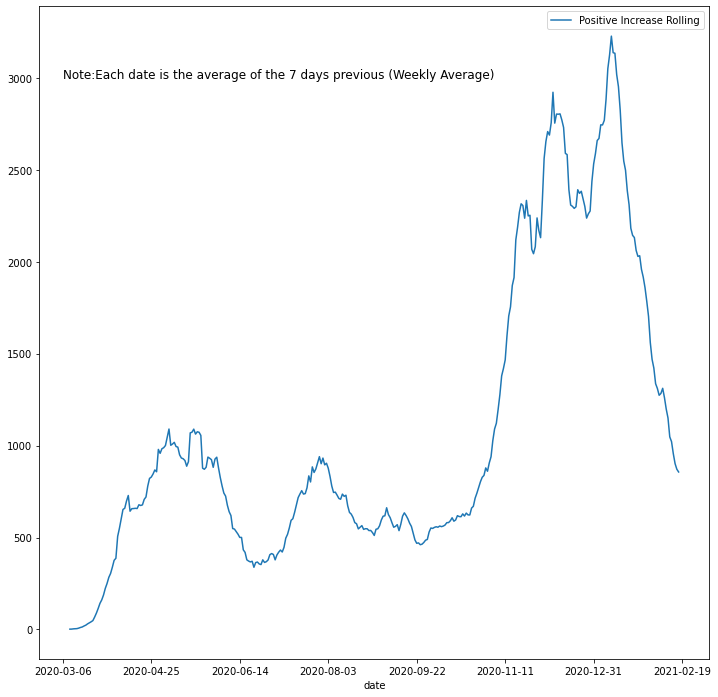

In [31]:
MD_COL_P.plot(kind='line',x='date',y='Positive Increase Rolling')
plt.gca().invert_xaxis()

plt.text(350, 3000, r'Note:Each date is the average of the 7 days previous (Weekly Average)',fontsize=12) # Annotation for the reader of the graph 

##2.Measuring and Visualizing "lag" time 

In [32]:
MD_COL_TOP_100=MD_COL.tail(100)
MD_FIRST_PEAK=MD_COL_TOP_100.sort_values(by=['positiveIncrease', 'date'],ascending=False) # Top to bottom value 


MD_COL_TOP_100=MD_COL.head(100)
MD_SECOND_PEAK=MD_COL_TOP_100.sort_values(by=['positiveIncrease', 'date'],ascending=False) # Take top one of positive cases on code below 


print (MD_SECOND_PEAK.head (1)) # I am sure that is easier way of doing this but I basically took the ascending order of a column and went head.(1) to get the top number of the dataframe. This is one is for positive cases 

    positiveIncrease  hospitalizedIncrease        date  deathIncrease
77              3792                   198  2020-12-04             26


In [33]:
MD_COL_TOP_100=MD_COL.tail(100) 
MD_COL_PEAK_HOS=MD_COL_TOP_100.sort_values(by=['hospitalizedIncrease', 'date'],ascending=False)   # Top to bottom value 

MD_COL_TOP_100=MD_COL.head(100)
MD_COL_PEAK_HOS_2=MD_COL_TOP_100.sort_values(by=['hospitalizedIncrease', 'date'],ascending=False) # Take top one of hospital cases on code below 

print (MD_COL_PEAK_HOS_2.head (1))                                                                 # I am sure that is easier way of doing this but I basically took the ascending order of a column and went head.(1) to get the top number of the dataframe. This is one is for hospital cases 

    positiveIncrease  hospitalizedIncrease        date  deathIncrease
56              2432                   469  2020-12-25             32


In [34]:
MD_COL_TOP_100=MD_COL.tail(100)
MD_COL_PEAK_HOS=MD_COL_TOP_100.sort_values(by=['deathIncrease', 'date'],ascending=False)   # Top to bottom value 

MD_COL_TOP_100=MD_COL.head(100)
MD_COL_PEAK_HOS_2=MD_COL_TOP_100.sort_values(by=['deathIncrease', 'date'],ascending=False) # Take top one of hospital cases on code below 

print (MD_COL_PEAK_HOS_2.head (1))                                                         # I am sure that is easier way of doing this but I basically took the ascending order of a column and went head.(1) to get the top number of the dataframe. This is one is for death cases 


    positiveIncrease  hospitalizedIncrease        date  deathIncrease
38              2665                   129  2021-01-12             66


Text(2.4, 41, 'Deaths:40 days After Peak Cases ')

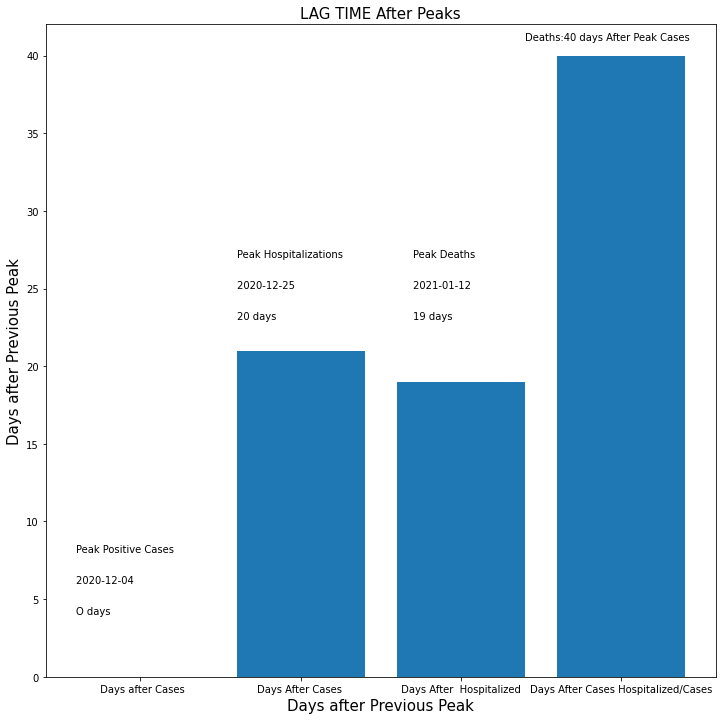

In [35]:
PEAKS_2 = [0, 21 , 19,40 ]                                                                                               # This is the previous values taken from the values above, I just looked at the dates and went from there, lag time= time between dates 

PEAKS = [' Days after Cases' ,'Days After Cases ',' Days After  Hospitalized ','Days After Cases Hospitalized/Cases' ]   # Annotate the lag time  


fig, ax = plt.subplots(figsize=(12,12))

ax.bar(PEAKS, PEAKS_2)                                                                                                  # Plot bar graphs 
ax.set_title("LAG TIME After Peaks",fontsize=15)
ax.set_xlabel("Days after Previous Peak",fontsize=15)
ax.set_ylabel("Days after Previous Peak",fontsize=15)


plt.text(-.4, 8, r'Peak Positive Cases',fontsize=10)                                                                   # Start at 0 because the start at cases (Annotated on graph)
plt.text(-.4, 6, r'2020-12-04 ',fontsize=10)
plt.text(-.4, 4, r'O days ',fontsize=10)

plt.text(.6, 27, r'Peak Hospitalizations',fontsize=10)                                                                 # After peak in cases peak hospitalizations (Annotated on graph). This occurs 20 days after peak cases. 
plt.text(.6, 25, r'2020-12-25 ',fontsize=10)
plt.text(.6, 23, r'20 days ',fontsize=10)

plt.text(1.7, 27, r'Peak Deaths',fontsize=10)                                                                          # After peak in cases peak deaths (Annotated on graph). This occurs 19 days after peak hospital cases. 
plt.text(1.7, 25, r'2021-01-12  ',fontsize=10)
plt.text(1.7, 23, r'19 days ',fontsize=10)

plt.text(2.4, 41, r'Deaths:40 days After Peak Cases ',fontsize=10)                                                    # 40 days after peak cases, peak deaths occur (annotated on graph)



##3.Overlay line graphs and annotate the graph (Identify peaks) 

Text(80, 15, '2nd Death Peak= 2021-01-12 ')

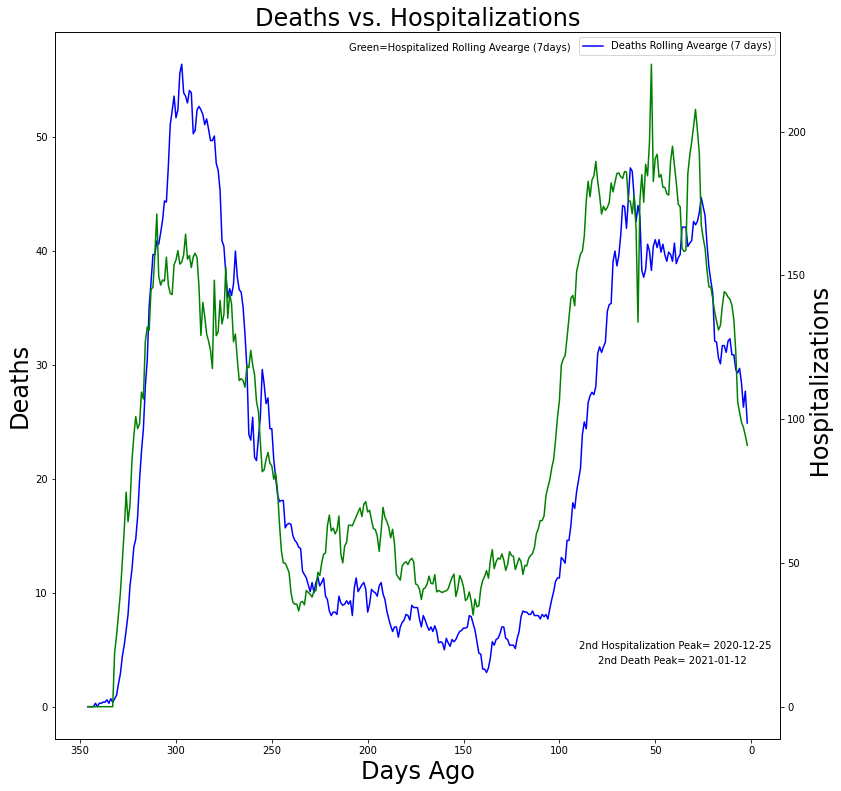

In [36]:
fig, ax = plt.subplots(figsize=(13,13)) 

ax2 = ax.twinx()                                                                                                              # I believe this portion gives the graph two labels, one for deaths and hospitalizations

ax.plot(MD_COL_D.index, MD_COL_D["Deaths Rolling Avearge (7 days)"], color='blue',label='Deaths Rolling Avearge (7 days)')    # Blue is the deaths rolling average (line graph)

ax2.plot(MD_COL_H.index, MD_COL_H["Hospitalized Rolling Avearge"], color='green',label='"Hospitalized Rolling Avearge')       # Green is the deaths rolling average (line graph)

ax.set_title('Deaths vs. Hospitalizations', fontsize=24)

ax.set_ylabel('Deaths', fontsize=24)                                                                                          # Print two y-labels one for deaths and one for hospitalizations 

ax2.set_ylabel(' Hospitalizations', fontsize=24)                                                                              # Print two y-labels one for deaths and one for hospitalizations 

ax.set_xlabel('Days Ago', fontsize=24)                                        


ax.legend(loc='best')

plt.gca().invert_xaxis()                                                                                                  # This is very interesting, one has to read the graphs as "days ago" as the graph does not become accurate without an inverted x-axis 


plt.text(210, 228, r'Green=Hospitalized Rolling Avearge (7days)',fontsize=10)                                            # Legend or "label" for the green line (Hospitalizations) doesn't work so I annotated the legends 

plt.text(90, 20, r'2nd Hospitalization Peak= 2020-12-25 ',fontsize=10)                                                   # Annotated 2nd Peaks to provide some context 

plt.text(80, 15, r'2nd Death Peak= 2021-01-12 ',fontsize=10)                                                             # Annotated 2nd Peaks to provide some context                                             



##4.Look at culumative stats such as mortality rate, hospitalization rate, and positive test rate 

In [37]:
MD_COL_R = Maryland_df [['hospitalizedCumulative','deathConfirmed','date','positiveCasesViral','totalTestResults']] # Gather Culumative Stats, select relevant columns  
MD_COL_R

,hospitalizedCumulative,deathConfirmed,date,positiveCasesViral,totalTestResults
0,34265.0,7495.0,2021-02-19,374974,7597220.0
1,34168.0,7479.0,2021-02-18,373966,7555013.0
2,34078.0,7449.0,2021-02-17,372980,7519063.0
3,33980.0,7430.0,2021-02-16,372221,7495908.0
4,33903.0,7400.0,2021-02-15,371705,7485941.0
...,...,...,...,...,...
347,NaN,NaN,2020-03-09,5,NaN
348,NaN,NaN,2020-03-08,3,NaN
349,NaN,NaN,2020-03-07,3,NaN
350,NaN,NaN,2020-03-06,3,NaN


In [38]:
MD_COL_R.head(1)  # Gather Culumative Stats, select top values 

,hospitalizedCumulative,deathConfirmed,date,positiveCasesViral,totalTestResults
0,34265.0,7495.0,2021-02-19,374974,7597220.0


In [39]:
Mortality_Rate= ((7495.0/374974)*100) # Use simple arithmetric to find percentages from the dataframe posted above 
Mortality_Rate

1.9988052504973677

In [40]:
Hospitalization_Rate= ((34265.0/374974)*100) # Use simple arithmetric to find percentages from the dataframe posted above 
Hospitalization_Rate

9.137966899038332

In [41]:
Positive_Test_Rate= ((374974/7597220.0)*100) # Use simple arithmetric to find percentages from the dataframe posted above 
Positive_Test_Rate

4.935673838588326

Text(0, 0.5, 'Percentage/Rate')

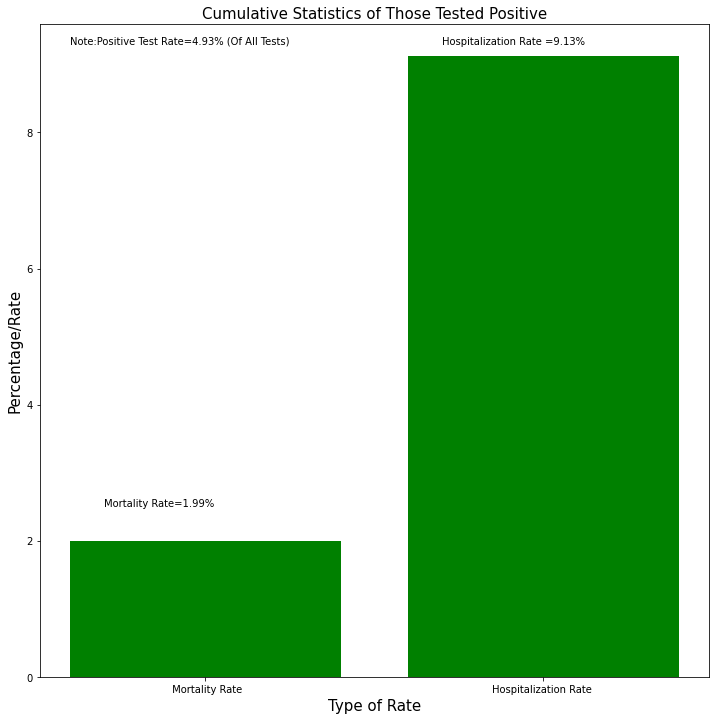

In [42]:
Rate_2 = [1.99, 9.13]  # Find percentages from the variables posted above 

Rates = [' Mortality Rate' ,'Hospitalization Rate ' ]   # Looking at 3 keys rates, using Culumative Stats


fig, ax = plt.subplots(figsize=(12,12))

ax.bar(Rates , Rate_2,color="green")                                          # I made it a green color to differentiate ii from the previous graph  


plt.text(-.3, 2.5, r'Mortality Rate=1.99%',fontsize=10)                       # I was going to use plotly, but annotating the percentages above the bars provides the reader with nice valuable details 

plt.text(.7, 9.3, r'Hospitalization Rate =9.13%',fontsize=10)

plt.text(-.4, 9.3, r'Note:Positive Test Rate=4.93% (Of All Tests)',fontsize=10)

ax.set_title("Cumulative Statistics of Those Tested Positive",fontsize=15)            # This title is very valuable detail, as some of percentages are as high as they are because they ONLY include THOSE TESTED, which tend to be more severe cases 

ax.set_xlabel("Type of Rate",fontsize=15)                                    # Standard labeling with some fontsize adjustment 

ax.set_ylabel("Percentage/Rate",fontsize=15)                                 # Standard labeling with some fontsize adjustment 

##5.Conclusions and Observations 

Observations:

1. One of the first quirks of the data that one notices is that the data (when visualizated) produces large "spikes" that need to be "smoothed" out. There is a references of this in the beginning.  The reason for this is simple, places of interest seem to underreport on Sundays and over report on Mondays thus creating a very "noisy" and "spikey" graph. This can be fixed when using a moving average of 7 days, of which I used to smooth the data. As a result, the graphs represent weekly averages not daily increases. One such example was when the Maryland history data reported no cases on Christmas Eve and a huge spike the next day. Obviously, the holiday prompted the "no cases report" and at this point the data didn't reflect real life cicumstances. So data needs to be smoothed before visualizations, for this reason. Additionally, one needs to use the bar graphs of lag time to identify peaks as the "smoothed" graphs does not offer a great way to display "lag time" between cases, hospitalizations, and deaths.        

2. Another interesting that I purposely left off, is the 1st peak in the beginning of the year. There is a couple of reasons why I left it out. For one, COVID-19 testing was very much undersupplied during the beginning of the pandemic, thus the 1st peak cases were well after peak deaths and hospitalizations and there was no sensible lag time between peaks, as testing was not sufficient until many months until after the pandemic. In other words, the trend of cases peaking with peak hospitalizations and peak deaths happening afterwards was simply not the case as testing itself lagged behind. This helps creating an impresssion of a low number of cases early on, because positive cases went undiagnosed and untested.   

3. One has to be careful in reading the last bar graph because, while it is revealing, the numbers and percentages are somewhat high due to including only the population of those tested positive. What this tells us, is that those tested positive are amoung the most severe cases as shown by a high hospitalization rate of nearly 10 percent. When one contracts COVID-19 the bar graphs showns accurate percentages but there are other factors they lead one to believe that these rates are lower for those who have COVID-19, such as asymptomatic COVID-19 patients or those who contracted the virus and never attempted to be tested. Alternatively when one can use the total population of Maryland to show a much lower rate, but I believe that the most useful data lies in telling a story of those who tested positive. 

Conclusions: 

Three important observations to take note when exploring this data set with its visualizations.

1) Spikes existed because counting was sometimes sparse on Sundays and Holidays. Therefore the graphs needed to be smoothed. 

2) The 1st peak doesn't offer as valuable information as the 2nd peak, because testing material was undersupplied and itself lagging. Most of the information regarding lag time was of the first peak.  

3) Telling a story of Cumulative Statistics was done amoung the population of people who tested positive for COVID-19, thus making numbers like the hospitalizations rate seem high .If one were to look at other populations, the number/rates would be lower. 
